Exp 4 : Unsupervised Learning

Clustering

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


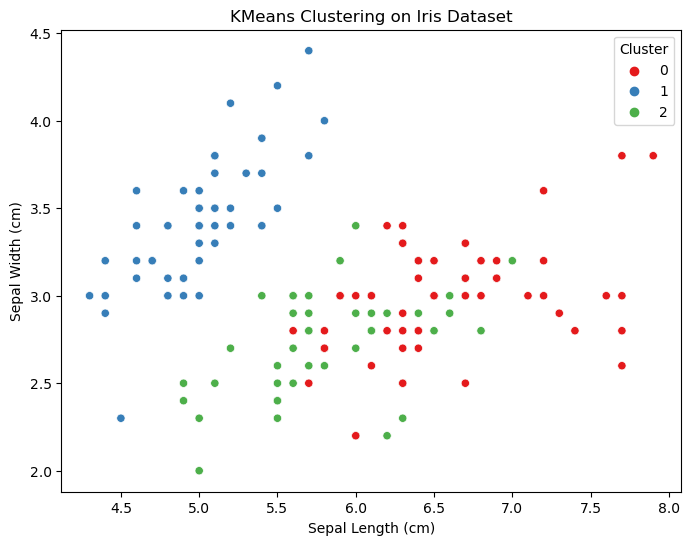

Cluster Centers:
[[6.62244898 2.98367347 5.57346939 2.03265306 2.        ]
 [5.006      3.428      1.462      0.246      0.        ]
 [5.91568627 2.76470588 4.26470588 1.33333333 1.01960784]]


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

# Fit the KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)
df["kmeans_labels"] = kmeans_model.fit_predict(df)

# Visualizing the clustering (using sepal length and sepal width for 2D plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="kmeans_labels",
    palette="Set1",
)
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Cluster")
plt.show()

# Optionally, display the cluster centers
print("Cluster Centers:")
print(kmeans_model.cluster_centers_)

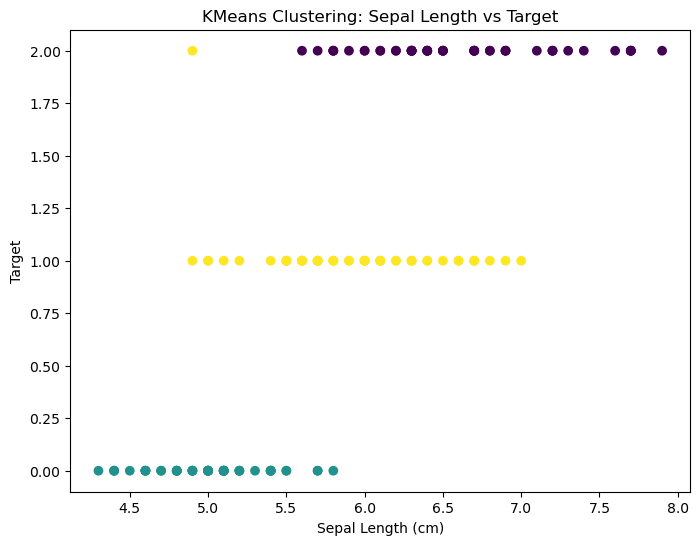

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x=df["sepal length (cm)"], y=df["target"], c=df["kmeans_labels"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Target")
plt.title("KMeans Clustering: Sepal Length vs Target")
plt.show()

In [10]:
#Intrinsic Method
from sklearn.metrics import silhouette_score
silhouette_score(df[['sepal length (cm)','target']], df['kmeans_labels'], metric = 'euclidean')

0.568359620258855

In [11]:
#Adjusted Rand Index
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df['target'], df['kmeans_labels'])

0.97993200471804

In [12]:
#Mutual Information
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(df['target'], df['kmeans_labels'])

0.9701911554558436